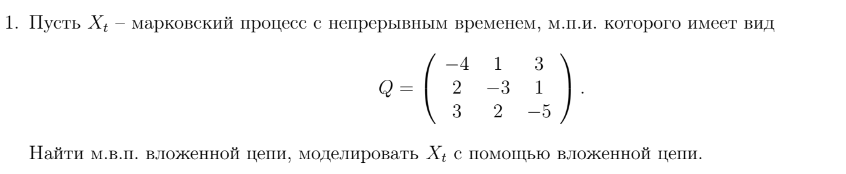

[[0.         0.25       0.75      ]
 [0.66666667 0.         0.33333333]
 [0.6        0.4        0.        ]]
Начальное состояние = 0


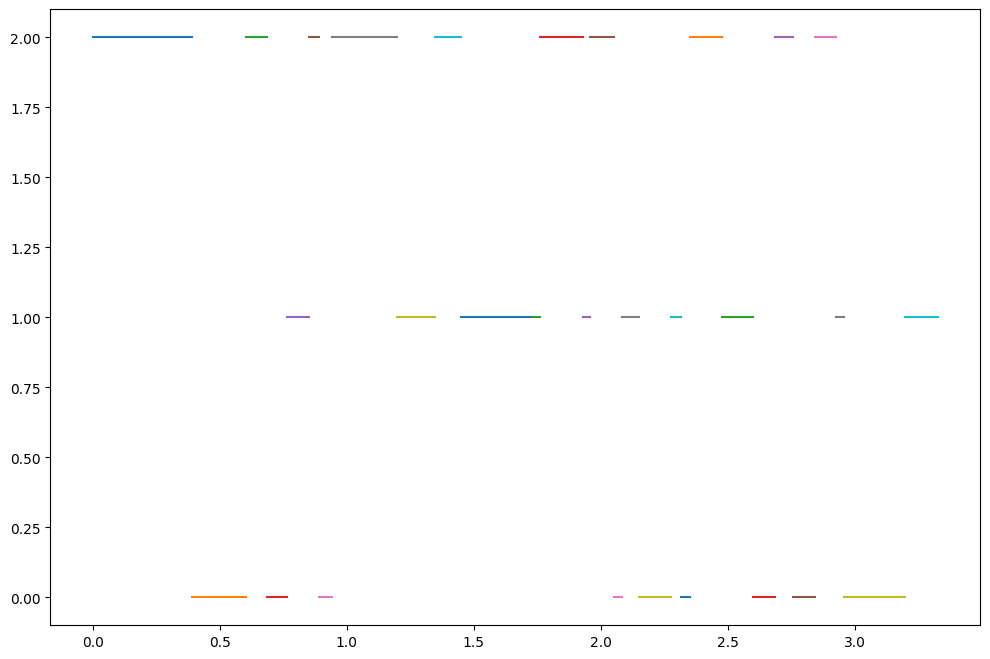

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts



Q = np.array([[-4,1,3],[2,-3,1], [3,2,-5]])
n = len(Q)
P = [[(-Q[i][j]/Q[i][i]) if i!=j else 0 for j in range (n)] for i in range(n)]
print(np.matrix(P))

k = 30 # кол-во шагов
place = 0 #начальное

Xt = np.zeros(k+1)
print(f'Начальное состояние = {place}')
leng = 0
x = [[],[]]
y = [[],[]]
for i in range(k):
    place_1 = np.mod(place + 1, 3)
    place_2 = np.mod(place + 2, 3)

    E_1 = sts.expon.rvs(scale = float(-1/Q[place_1][place_1]))
    E_2 = sts.expon.rvs(scale = float(-1/Q[place_2][place_2]))
    E = np.minimum(E_1, E_2)

    if E == E_1:
        place = place_1
    else:
        place = place_2

    x[0].append(leng)
    x[1].append(leng + E)
    y[0].append(place)
    y[1].append(place)

    leng += E

plt.figure(figsize=(12,8))
plt.step(x,y);


Другой способ:

[[0.         0.25       0.75      ]
 [0.66666667 0.         0.33333333]
 [0.6        0.4        0.        ]]
Начальное состояние = 0


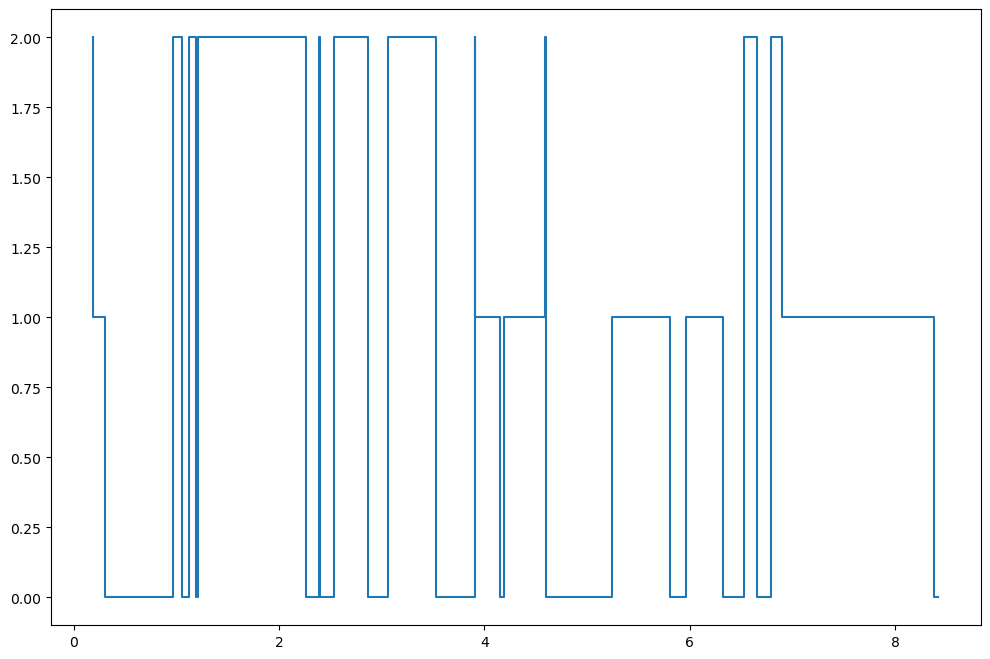

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts



Q = np.array([[-4,1,3],[2,-3,1], [3,2,-5]])
n = len(Q)
P = [[(-Q[i][j]/Q[i][i]) if i!=j else 0 for j in range (n)] for i in range(n)]
print(np.matrix(P))

k = 30 # кол-во шагов
place = 0 #начальное

Xt = np.zeros(k+1)
print(f'Начальное состояние = {place}')
leng = 0
x = []
y = []
for i in range(k):
    place_1 = np.mod(place + 1, 3)
    place_2 = np.mod(place + 2, 3)

    place_old = place
    place = np.random.choice([place_1, place_2], p = [P[int(place)][int(place_1)], P[int(place)][int(place_2)]])
    y.append(place)
    
    E_1 = sts.expon.rvs(scale = float(-1/Q[place][place]))
    E = E_1

    x.append(leng + E)
    

    leng += E

plt.figure(figsize=(12,8))
plt.step(x,y);

Ещё один способ:

[[0.         0.25       0.75      ]
 [0.66666667 0.         0.33333333]
 [0.6        0.4        0.        ]]
Начальное состояние = 0


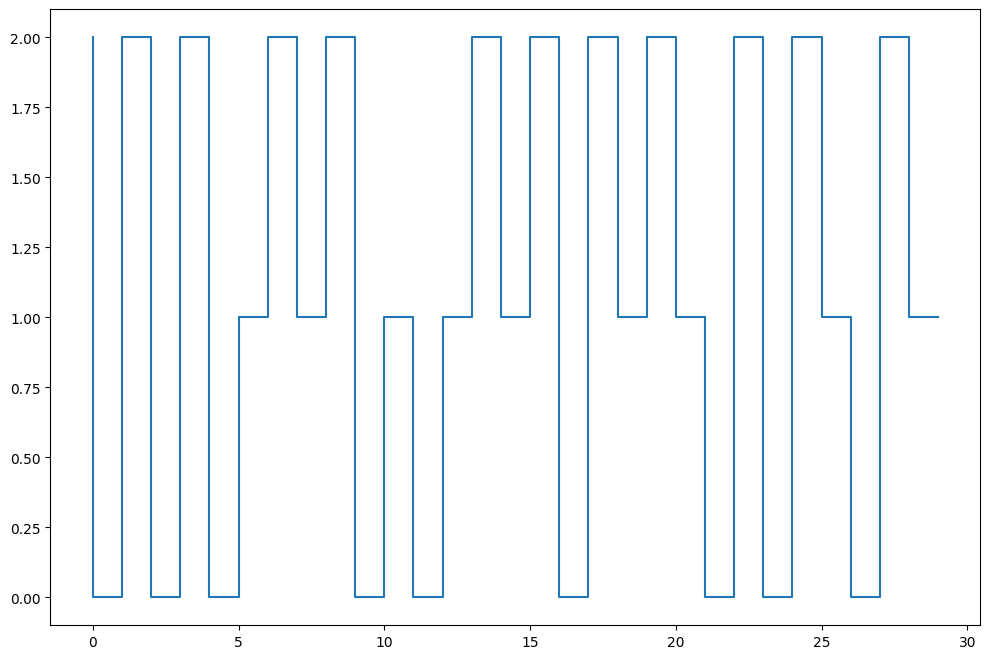

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts



Q = np.array([[-4,1,3],[2,-3,1], [3,2,-5]])
n = len(Q)
P = [[(-Q[i][j]/Q[i][i]) if i!=j else 0 for j in range (n)] for i in range(n)]
print(np.matrix(P))

k = 30 # кол-во шагов
place = 0 #начальное

Xt = np.zeros(k+1)
print(f'Начальное состояние = {place}')
leng = 0
x = []
y = []
for i in range(k):
    place_1 = np.mod(place + 1, 3)
    place_2 = np.mod(place + 2, 3)

    place = np.random.choice([place_1, place_2], p = [P[int(place)][int(place_1)], P[int(place)][int(place_2)]])
    y.append(place)

plt.figure(figsize=(12,8))
x = np.array([i for i in range(len(y))])
plt.step(x,y);

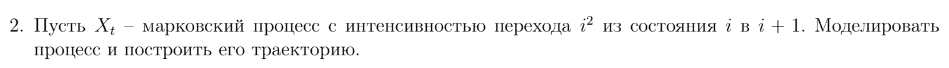

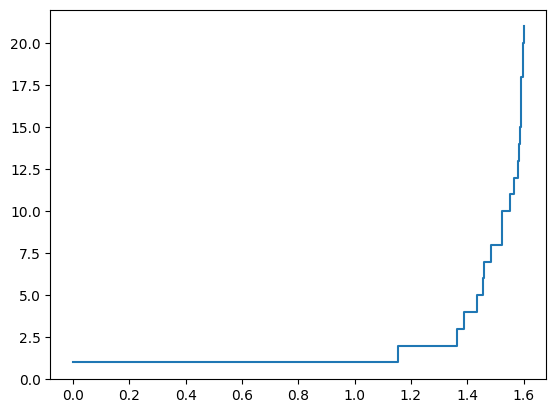

In [9]:
k = 20 #количество шагов
j = 1 #начальное состояние
x = np.arange(1, k+1)
tr = sts.expon.rvs(scale = 1/(x**2))
T = np.cumsum(tr) # время скачков 
T = np.insert(T,0,0)
x = np.arange(1, k+2)
plt.step(T, x, where="post")

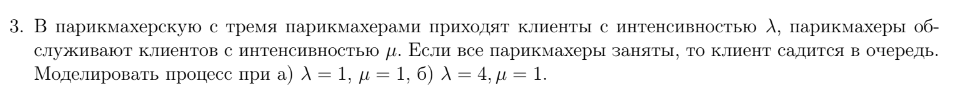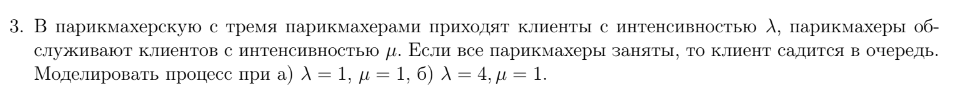

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

def fun(k, lyam, mu, n, j): 
    '''
    k - число парихмахеров
    n - число изменений состояния 
    j - начальное состояние
    '''
    P = np.zeros((k+1, 3))
    Q = np.zeros((k+1, 3))
    for i in range(k+1):
        P[i][2] = lyam/(lyam+i*mu)
        Q[i][2] = lyam
        P[i][0] = i*mu/(lyam+i*mu)
        Q[i][0] = i*mu
    print("P:",P)
    print("Q:", Q)
    x = np.zeros(n+1) 
    x[0] = j
    t = np.zeros(n+1)
    # T=0
    print(f'Начальное состояние = {j}')
    for i in range(n):
        jp = j 
        j = np.random.choice(3, 1,  p = P[j*(j<k) + k*(j>=k)])[0] -1 + jp # перешли направо (+1) или налево (-1) + начальное состояние 
        x[i+1] = j
        E = sts.expon.rvs(scale = float(1/( lyam + mu*(jp*(jp<k) + k*(jp>=k)))      ))
        t[i+1] = t[i]+E
        # print(f'Были в состоянии {x[i]} с {t[i]} с {t[i+1]}, провели в нем exp({int(lyam + mu*(jp*(jp<k) + k*(jp>=k)))})')
    return x, t

P: [[0.         0.         1.        ]
 [0.5        0.         0.5       ]
 [0.66666667 0.         0.33333333]
 [0.75       0.         0.25      ]]
Q: [[0. 0. 1.]
 [1. 0. 1.]
 [2. 0. 1.]
 [3. 0. 1.]]
Начальное состояние = 2


'\nневозвратное при 3*mu<l\n'

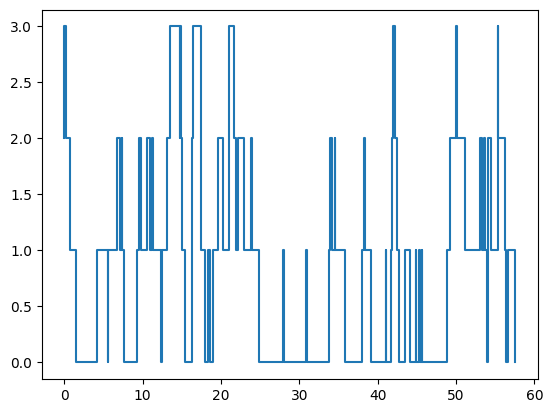

In [17]:

x, t = fun(3,1,1,100,2)
# print(x)
# print(t)
plt.step(t, x, where = 'post')
'''
невозвратное при 3*mu<l
'''

P: [[0.         0.         1.        ]
 [0.2        0.         0.8       ]
 [0.33333333 0.         0.66666667]
 [0.42857143 0.         0.57142857]]
Q: [[0. 0. 4.]
 [1. 0. 4.]
 [2. 0. 4.]
 [3. 0. 4.]]
Начальное состояние = 2


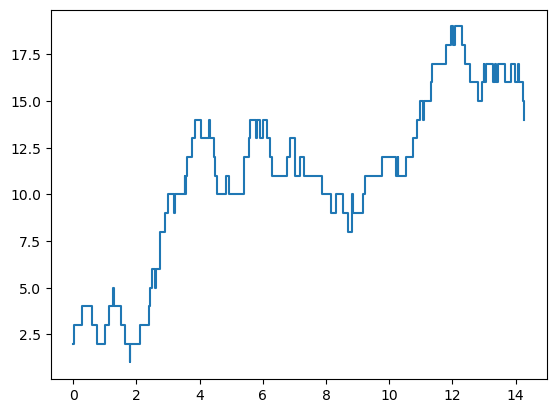

In [3]:
x, t = fun(3,4,1,100,2)
# print(x)
# print(t)
plt.step(t, x, where = 'post')

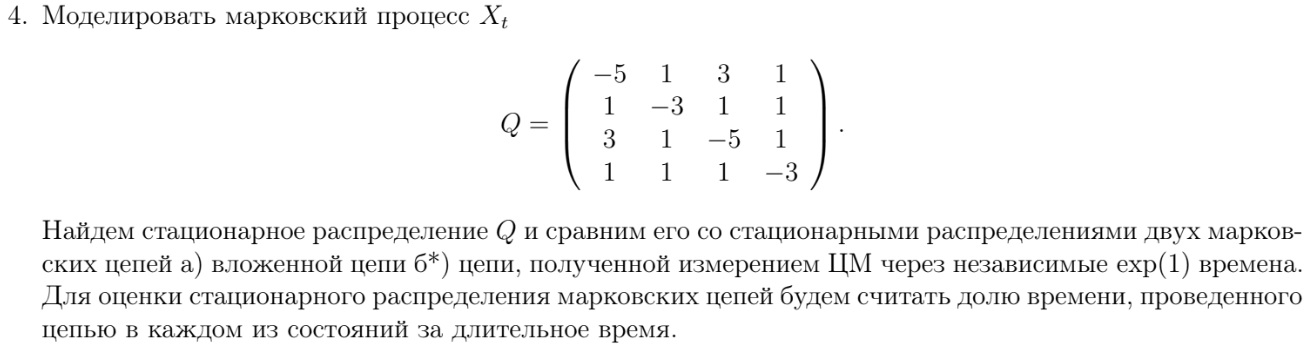

In [10]:
import numpy as np
import scipy.stats as sts

Q = np.array([[-5,1,3,1],
              [1,-3,1,1],
              [3,1,-5,1],
              [1,1,1,-3]])
print(np.matrix(Q))

def Sti(P,close_to):#стационарное распределение
	eigenvalues, eigenvectors = np.linalg.eig(P.T)
	stationary_vector = eigenvectors[:, np.isclose(eigenvalues, close_to)]
	stationary_vector = stationary_vector[:, 0]
	stationary_vector = stationary_vector / np.sum(stationary_vector)
	vec = np.array(stationary_vector.real.T)
	return vec


pi_Q = Sti(Q,0)
print(f'Стационарное распределение процесса = {pi_Q}')
n = len(Q)
P = np.array([[(-Q[i][j]/Q[i][i]) if i!=j else 0 for j in range (n)] for i in range(n)])
print(np.matrix(P))
pi_P = Sti(P,1)
print(f'Стационарное распределение вложенной цепи = {pi_P}')



[[-5  1  3  1]
 [ 1 -3  1  1]
 [ 3  1 -5  1]
 [ 1  1  1 -3]]
Стационарное распределение процесса = [0.25 0.25 0.25 0.25]
[[0.         0.2        0.6        0.2       ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.6        0.2        0.         0.2       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]
Стационарное распределение вложенной цепи = [0.3125 0.1875 0.3125 0.1875]


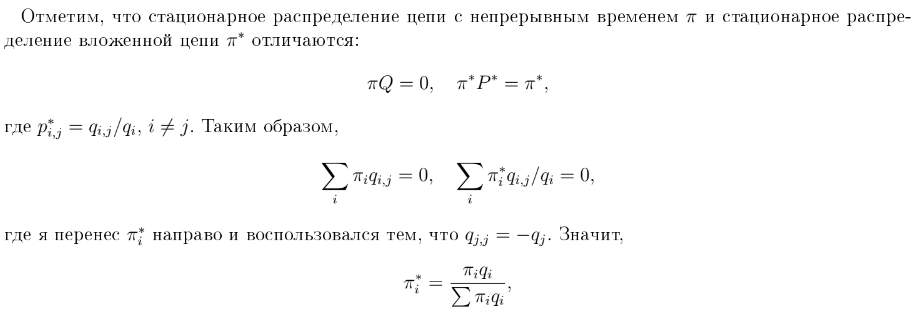

In [11]:
tmp_vec = []
for i in range(4):
    tmp_vec.append(pi_Q[i]*(-Q[i][i]))
pi = [pi_Q[i]*(-Q[i][i])/np.sum(tmp_vec) for i in range(4)]
print(pi)

[0.31249999999999994, 0.1875, 0.3125000000000001, 0.1875]


совпало

In [14]:
T = 1000 #общее время наблюдений
t = np.zeros(n) #хранятся времена в каждом состоянии 
time = 0
state = 0 #начальное состояние
while time<T:
    E = sts.expon.rvs(scale = float(-1/Q[state][state])) # были в состоянии state время 
    t[state]+=E
    time+=E
    state = np.random.choice(n, 1,  p = P[state])[0] #куда перешли
print(f'Оценка стационарного состояния процесса:{t/T}')
'''
t[i]/T -> pi_i по збч, так как цепь неразложима и положительно возвратна (тк существует стац распр и неразл)
'''
T = 1000 #общее время наблюдений
t = np.zeros(n) #хранятся времена в каждом состоянии 
time = 0
state = 0 #начальное состояние
E = sts.expon.rvs(size = T*10)
i = 0
while time<T:
    t[state]+=E[i]
    nn[state]+=np.sum([ex[i]>time and ex[i]<time+E[i] for i in range(5000)])
    time+=E[i]
    state = np.random.choice(n, 1,  p = P[state])[0] #куда перешли
    i+=1
print(f'Оценка стационарного состояния вложенной цепи:{t/T}')


Оценка стационарного состояния процесса:[0.24521633 0.2401285  0.25703776 0.25762915]
Оценка стационарного состояния вложенной цепи:[0.33090346 0.16226234 0.32886702 0.1799609 ]
